# **EDA | Assignment**

**Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.**

*(Show the shape and column names as well.)*

*(Include your Python code and output in the code box below.)*

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Step 1 : Display first 10 rows
print("The first 10 rows of dataset:")
print(df.head(10))

# Step 2: Show dataset shape (rows, columns)
print("\n\nThe shape of the dataset is:")
print(df.shape)

# Step 3: Show all column names
print("\n\nColumn names in the data are:")
print(df.columns)

The first 10 rows of dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN 

**Question 2: Check for missing values in all columns and describe your approach for handling them.**

*(Include your Python code and output in the code box below.)*

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Step 1: Check missing values
print("Missing values in each columns are:")
print(df.isnull().sum())

# Observation:
# - Only 'ex_showroom_price' has 472 missing values
# - All other columns are complete

# Step 2: Handle missing values
# Approach: Fill missing 'ex_showroom_price' with median
df["ex_showroom_price"].fillna(df["ex_showroom_price"].median(), inplace = True)

# Step 3: Verify again
print("\n\nData after handling missing values")
print(df.isnull().sum())

# Now dataset has no missing values

Missing values in each columns are:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


Data after handling missing values
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


/tmp/ipython-input-3525916467.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ex_showroom_price"].fillna(df["ex_showroom_price"].median(), inplace = True)


In [3]:
# **Interpretation:**
# * Only the column ex_showroom_price has 472 missing values.
# * All other columns are complete (no missing values).

#  **Approach for Handling Missing Values:**
# 1. Since ex_showroom_price is numerical and important for price comparison, we should not drop these rows.
# 2. We can fill missing values using: mean/Median of the column (if distribution is normal, use mean; if skewed, use median).

**Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.**

*(Include your Python code and output in the code box below.)*

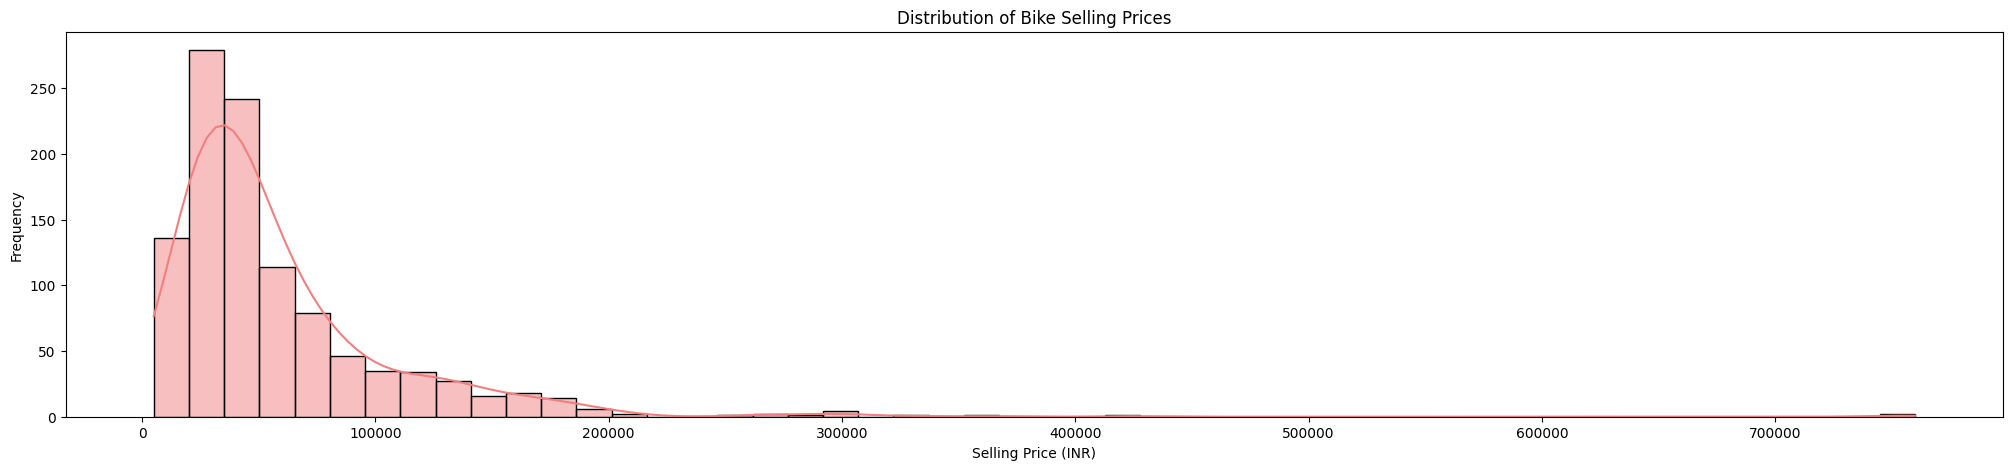

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Step 1: Plot histogram for selling_price
plt.figure(figsize = (25,5))
sns.histplot(df['selling_price'], kde = True, bins = 50, color = 'lightcoral')

# Step 2: Add labels and title
plt.xlabel("Selling Price (INR)")
plt.ylabel("Frequency")
plt.title("Distribution of Bike Selling Prices")
plt.show()

In [5]:
# Interpretation:
# - The distribution is right-skewed (most bikes are sold at lower prices).
# - A large number of bikes fall in the price range below ~1,00,000 INR.
# - Few bikes are sold at very high prices (long tail on the right).

**Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

*(Include your Python code and output in the code box below.)*

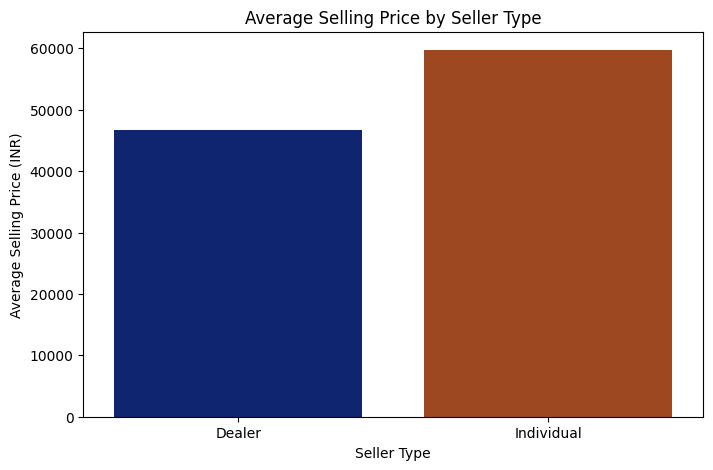

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Step 1: Group data by seller_type and calculate mean selling price
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Step 2: Plot bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='dark')

# Step 3: Add labels and title
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price (INR)")
plt.title("Average Selling Price by Seller Type")
plt.show()


In [7]:
# Observation:
# - Bikes sold by "Dealer" have a slightly higher average selling price than "Individual" sellers.
# - This could be because dealers usually sell newer or well-maintained bikes.

**Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.**

*(Include your Python code and output ian the code box below.)*

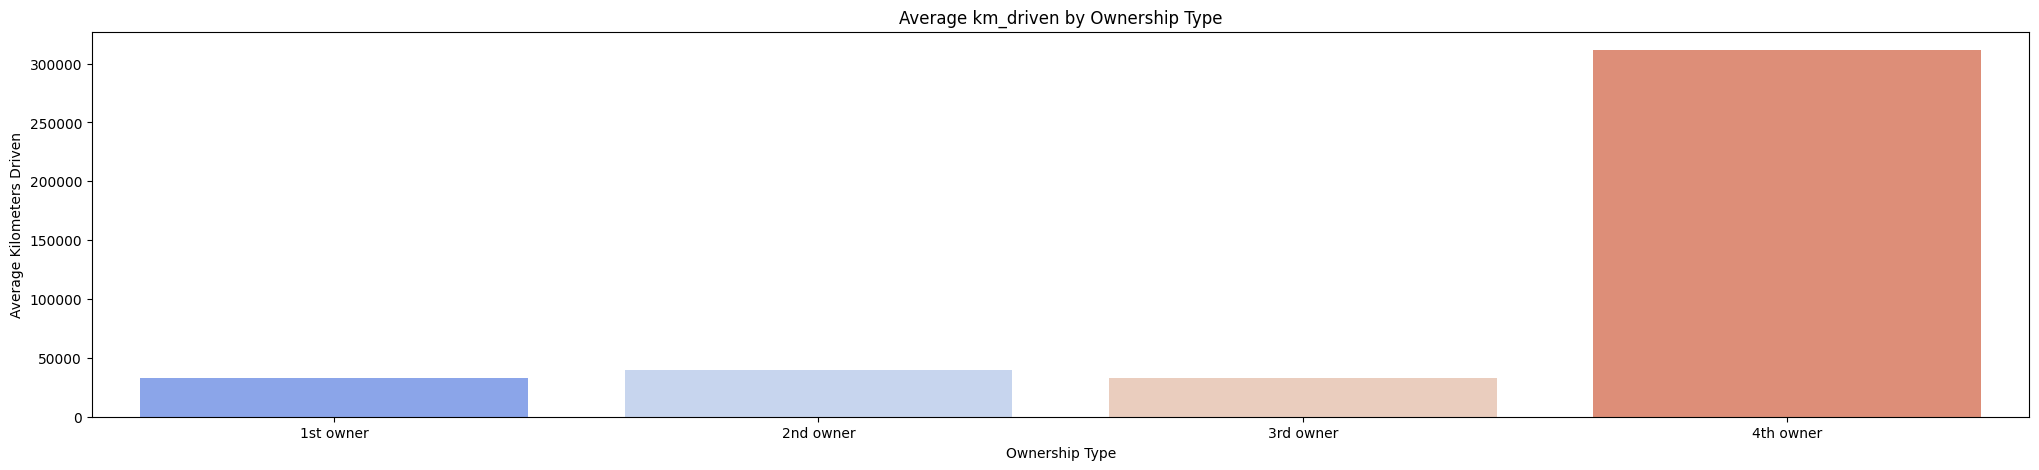

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Step 1: Group data by ownership type and calculate mean of km driven
avg_km_driven = df.groupby('owner')['km_driven'].mean().reset_index()

# Step 2: Plot bar plot
plt.figure(figsize=(25,5))
sns.barplot(x='owner', y='km_driven', data=avg_km_driven, palette='coolwarm')

# Step 3: Add labels and title
plt.xlabel("Ownership Type")
plt.ylabel("Average Kilometers Driven")
plt.title("Average km_driven by Ownership Type")
plt.show()


In [9]:
# Observation:
# - 1st owner bikes have the lowest average km_driven.
# - As the ownership increases (2nd, 3rd owner), the average km_driven also increases, indicating more usage over time.

**Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.**

*(Include your Python code and output in the code box below.)*

In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Fill missing values for simplicity
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

# Summary stats before removing outliers
print("Before removing outliers:")
print(df['km_driven'].describe())

# IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary stats after removing outliers
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


**Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.**

*(Include your Python code and output in the code box below.)*

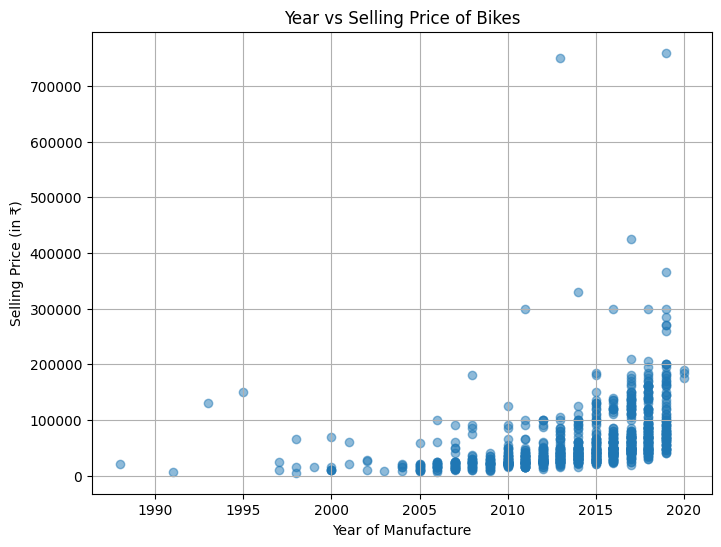

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(8,6))
plt.scatter(df['year'], df['selling_price'], alpha=0.5)
plt.title('Year vs Selling Price of Bikes')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price (in ₹)')
plt.grid(True)
plt.show()

In [12]:
# Interpretation

# The scatter plot shows that as the year increases (newer bikes), the selling price tends to be higher.
# Older bikes (lower year values) have lower selling prices due to depreciation and wear.
# There may be a few outliers, like old bikes with high prices (possibly rare or premium models)

**Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.**

*(Include your Python code and output in the code box below.)*

In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create the encoder
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fit and transform the seller_type column
encoded = encoder.fit_transform(df[['seller_type']])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['seller_type']))

# Combine with original data
df_encoded = pd.concat([df, encoded_df], axis=1)

# Display first 5 rows
print(df_encoded.head())


                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  seller_type_Dealer  \
0  1st owner        350            72752.5                 0.0   
1  1st owner       5650            72752.5                 0.0   
2  1st owner      12000           148114.0                 0.0   
3  1st owner      23000            89643.0                 0.0   
4  2nd owner      21000            72752.5                 0.0   

   seller_type_Individual  
0                     1.0  
1                     1.0  
2                     1.0  
3                     1.0  
4           

**Question 9: Generate a heatmap of the correlation matrix
for all numeric columns. What correlations stand out the most?**

*(Include your Python code and output in the code box below.)*

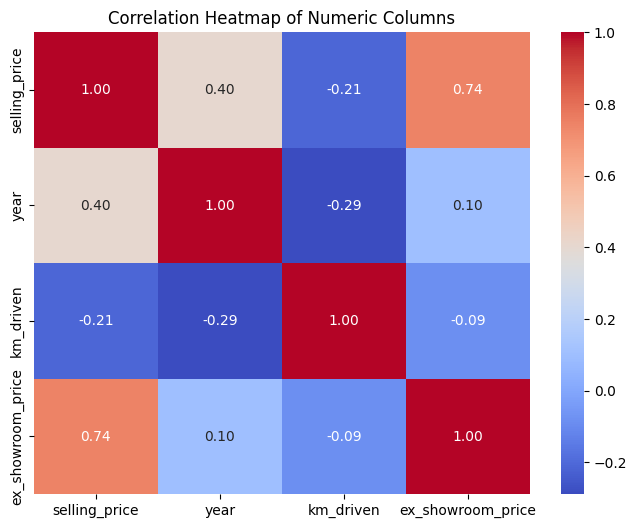

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

In [ ]:
# Interpretation
# selling_price shows a moderate positive correlation with ex_showroom_price — meaning bikes with higher showroom prices tend to sell for more.
# year also has a slight positive correlation with selling_price — newer bikes usually sell for higher prices.
# km_driven shows a weak or negative correlation with selling_price — older, more-used bikes are cheaper.

**Question 10: Summarize your findings in a brief report:**

**● What are the most important factors affecting a bike's selling price?**

**● Mention any data cleaning or feature engineering you performed.**

*(Include your Python code and output in the code box below.)*

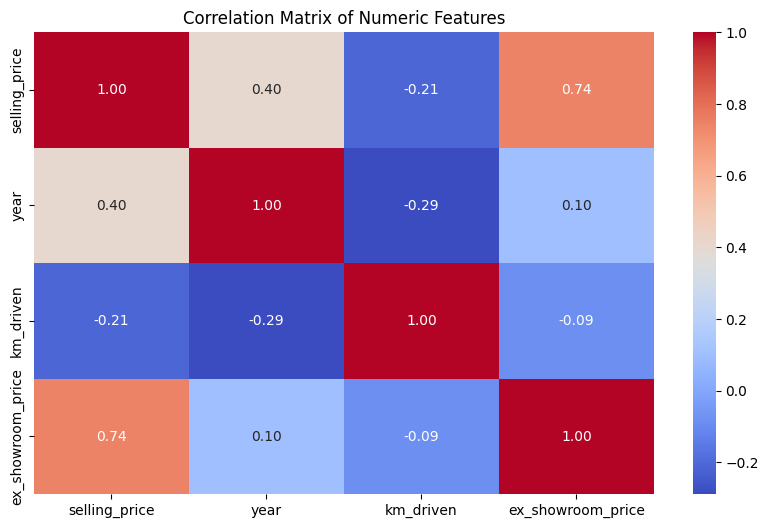

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Fill missing ex_showroom_price
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

# Convert km_driven to numeric
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [ ]:
# Interpretation / Findings:
# Most important factors affecting bike selling price:
# Ex-showroom price: Higher showroom price → higher selling price
# Year of manufacture: Newer bikes sell for more
# Kilometers driven: More km → lower selling price
# Ownership type: 1st owner bikes generally sell for more
# Seller type: Dealer vs Individual affects price slightly

# Data Cleaning & Feature Engineering performed:
# Filled missing values in ex_showroom_price using median
# Converted km_driven to numeric type
# Removed outliers in km_driven using IQR method

# Encoded categorical variables:
# One-hot encoding for seller_type
# Label encoding for ownership types if needed

# Generated correlation heatmap to identify key relationships